In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.covariance import EmpiricalCovariance



In [35]:
sgcredit_df = pd.read_table("../data/SouthGermanCredit/SouthGermanCredit.asc", header=0, sep=None)

/home/nic/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [36]:
sgcredit_df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [37]:
#Change column names from German to English

sgcredit_df = sgcredit_df.rename(columns=({"laufkont" : "status", "laufzeit" : "duration", "moral" : "credit history", "verw" : "purpose", "hoehe" : "amount", 
                    "sparkont" : "savings", "beszeit" : "employment duration", "rate" : "installment rate",
                    "famges" : "personal status sex", "buerge" : "other debtors",
                    "wohnzeit" : "present residence", "verm" : "property",
                    "alter" : "age", "weitkred" : "other installment plans",
                    "wohn" : "housing", "bishkred" : "number credits",
                    "beruf" : "job", "pers" : "people liable", "telef" : "telephone", "gastarb" : "foreign worker",
                    "kredit" : "credit risk"}))

In [38]:
# sns.pairplot(sgcredit_df)

In [39]:
sgcredit_df.sample(15)

,status,duration,credit history,purpose,amount,savings,employment duration,installment rate,personal status sex,other debtors,...,property,age,other installment plans,housing,number credits,job,people liable,telephone,foreign worker,credit risk
407,2,9,2,9,1391,1,3,2,4,1,...,1,27,1,2,1,3,2,2,2,1
529,4,18,4,3,2238,1,3,2,2,1,...,3,25,3,2,2,3,2,1,2,1
92,2,30,0,9,4221,1,3,2,2,1,...,3,28,3,2,2,3,2,1,2,1
77,4,24,4,0,1940,4,5,4,3,1,...,1,60,3,2,1,3,2,2,2,1
807,1,60,3,9,6836,1,5,3,3,1,...,4,63,3,2,2,3,2,2,2,0
810,2,48,2,9,15672,1,3,2,3,1,...,3,23,3,2,1,3,2,2,2,0
906,1,18,1,2,1553,1,3,4,3,1,...,3,44,1,2,1,3,2,1,2,0
255,3,15,2,9,2687,1,4,2,3,1,...,2,26,3,1,1,3,2,2,2,1
427,2,9,4,6,1501,1,5,2,2,1,...,3,34,3,2,2,4,2,2,2,0
168,4,15,4,2,2788,1,4,2,2,2,...,3,24,1,2,2,3,2,1,2,1


In [97]:
# sns.pairplot(sgcredit_df)

AttributeError: 'FacetGrid' object has no attribute 'map_lower'

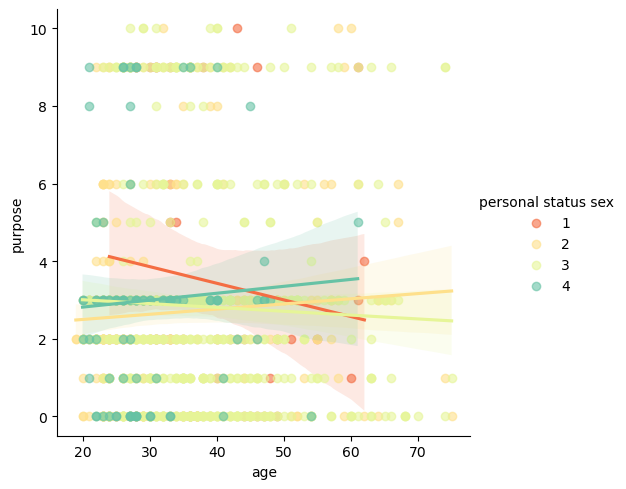

In [98]:
g = sns.lmplot(
    data=sgcredit_df, 
    x="age", y="purpose", 
    hue="personal status sex", 
    palette= "Spectral", 
    scatter_kws={'alpha':0.6}, logistic=False)
# g.map_lower(sns.kdeplot, levels=1, color=".2")

In [41]:
# sns.lineplot(
#     data=sgcredit_df,
#     x="age", y="savings", 
#     hue="status", 
#     palette= "Spectral"
#     )

In [84]:

X = sgcredit_df["age"].values
y = sgcredit_df["amount"].values
# x_axis = np.linspace(0,1,len(X))

lr_model = LinearRegression()
lr_model.fit(X.reshape(-1, 1), y)

LinearRegression()

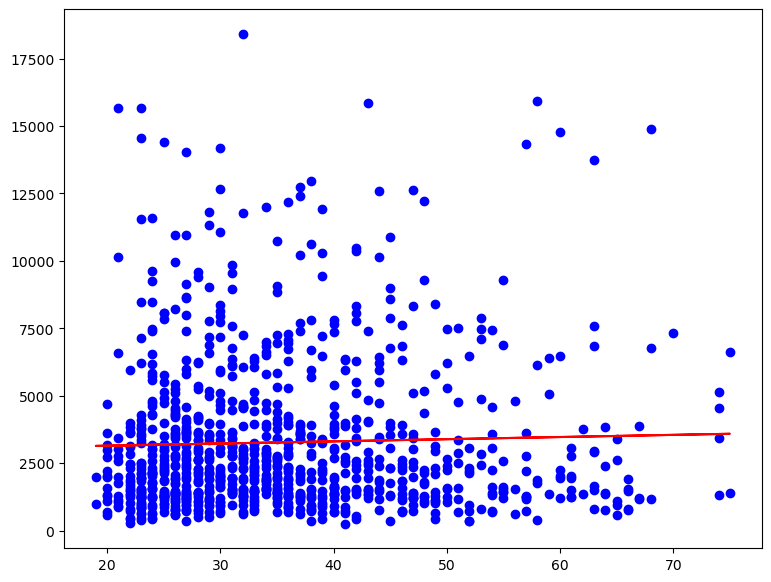

In [85]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter((X.reshape(-1,1)),y, color='blue')
ax.plot((X.reshape(-1,1)), lr_model.predict(X.reshape(-1,1)), color='red')

<AxesSubplot:xlabel='age', ylabel='amount'>

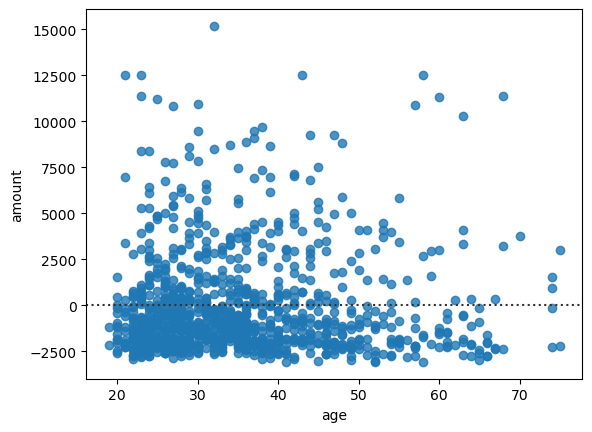

In [86]:

sns.residplot(data=sgcredit_df, x="age", y="amount", line_kws=dict(color="r"))

In [87]:
X_q = np.empty((len(sgcredit_df["age"].values), 2))
X_q[:, 0] = sgcredit_df["age"].values
X_q[:, 1] = sgcredit_df["age"].values**2

In [88]:
quadratic_model = LinearRegression()
quadratic_model.fit(X_q, y)

LinearRegression()

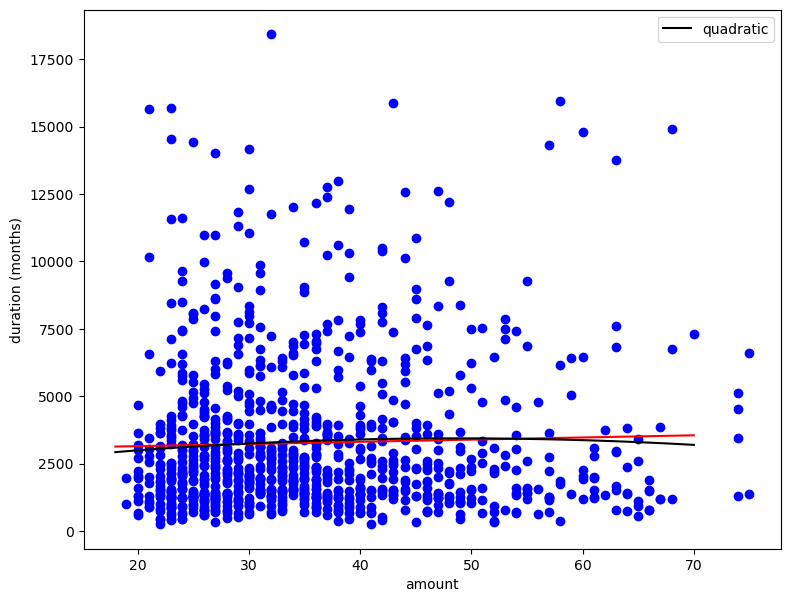

In [95]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(sgcredit_df.age.values, y, color="blue")
xvals = np.linspace(18, 70)
ax.plot(xvals,lr_model.predict(
    xvals.reshape(-1, 1)), color="red")
Xfeatures = np.empty((len(xvals), 2))
Xfeatures[:, 0] = xvals
Xfeatures[:, 1] = xvals * xvals
ax.plot(xvals, quadratic_model.predict(Xfeatures),
        color="black", label='quadratic')
ax.set_xlabel('amount')
ax.set_ylabel('duration (months)')
ax.legend()

<AxesSubplot:xlabel='amount', ylabel='age'>

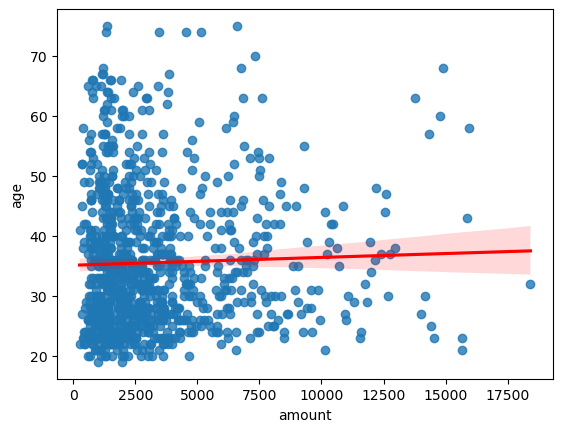

In [83]:

##Regression of age as target and amount as feature

sns.regplot(data=sgcredit_df, y="age", x="amount", line_kws=dict(color="r"))

<AxesSubplot:xlabel='amount', ylabel='duration'>

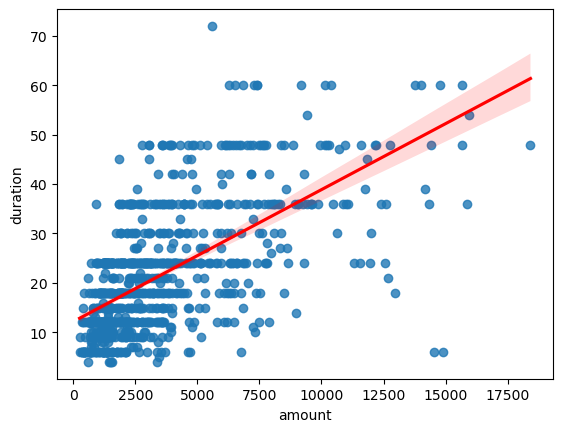

In [82]:
sns.regplot(data=sgcredit_df, y="duration", x="amount", line_kws=dict(color="r"))

In [96]:
# fw= sgcredit_df["foreign worker"].value_counts   , line_kws=dict(color="r")

# sns.countplot(data=sgcredit_df, hue="foreign worker", y="personal status sex")

<AxesSubplot:xlabel='status', ylabel='credit risk'>

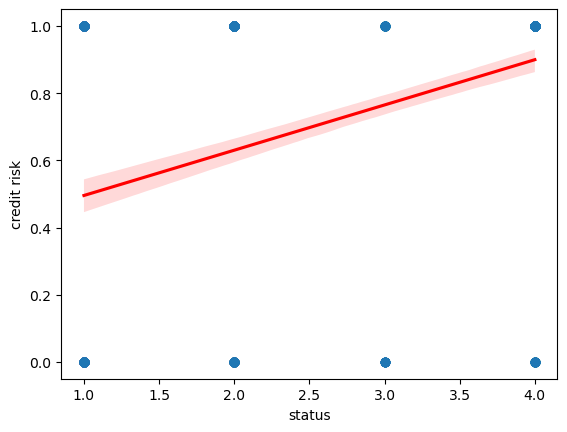

In [50]:
##Regression with Credit risk as the target and Status as the feature

sns.regplot(data=sgcredit_df, y="credit risk", x="status", robust=True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='status', ylabel='count'>

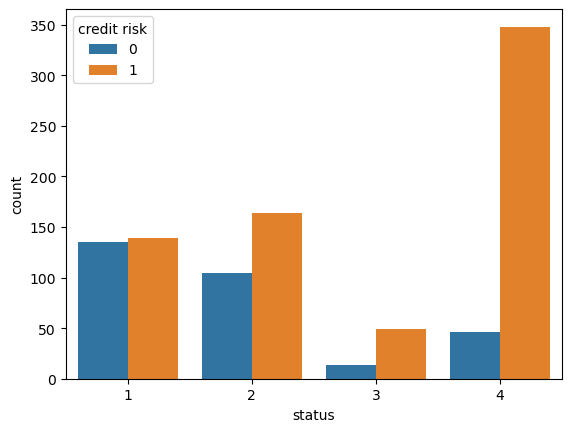

In [71]:
sns.countplot(data=sgcredit_df, hue="credit risk", x="status")

<AxesSubplot:xlabel='age', ylabel='personal status sex'>

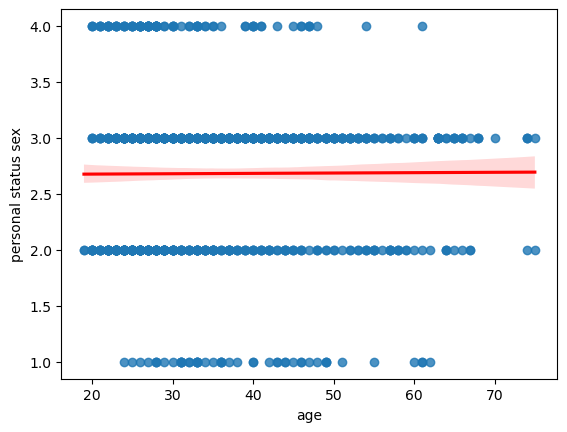

In [75]:

"""  
    personal_status_sex                                   
    1 : male : divorced/separated         
    2 : female : non-single or male : single  ## Why!? ##
    3 : male : married/widowed              
    4 : female : single  
"""

sns.regplot(data=sgcredit_df, y="personal status sex", x="age", line_kws=dict(color="r"))

In [90]:
# mean_squared_error(y, lr_model.predict(X.reshape(-1, 1)))

EmpiricalCovariance()

EmpiricalCovariance()

In [101]:
# mean_squared_error(y, quadratic_model.predict(X_q))

In [99]:
r2_score(y, lr_model.predict(X.reshape(-1, 1)))

0.0010415257119074095

In [100]:
r2_score(y, quadratic_model.predict(X_q))

0.001984311615285006

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [104]:
# Fit your model using the training set
reg = KNeighborsRegressor()
reg.fit(X_train.reshape(-1,1), y_train)

# Call predict to get the predicted values for training and test set
train_predicted = reg.predict(X_train.reshape(-1,1))
test_predicted = reg.predict(X_test.reshape(-1,1))

# Calculate RMSE for training and test set
print( 'RMSE for training set ', mean_squared_error(train_predicted, y_train) )
print( 'RMSE for test set ', mean_squared_error(test_predicted, y_test) )

RMSE for training set  8441339.812959999
RMSE for test set  9038092.877439998


In [33]:
# cross_val_score()
# sgcredit_df["age"].values

In [22]:
a = sgcredit_df["age"].values
y = sgcredit_df["status"].values
x_axis = np.linspace(0,1,len(a))

lr_model = LinearRegression()
lr_model.fit(a.reshape(-1, 1), y)

LinearRegression()

In [23]:
X_q = np.empty((len(sgcredit_df.age.values), 2))
X_q[:, 0] = sgcredit_df.age.values
X_q[:, 1] = sgcredit_df.age.values**2

quadratic_model = LinearRegression()
quadratic_model.fit(X_q, y)

LinearRegression()

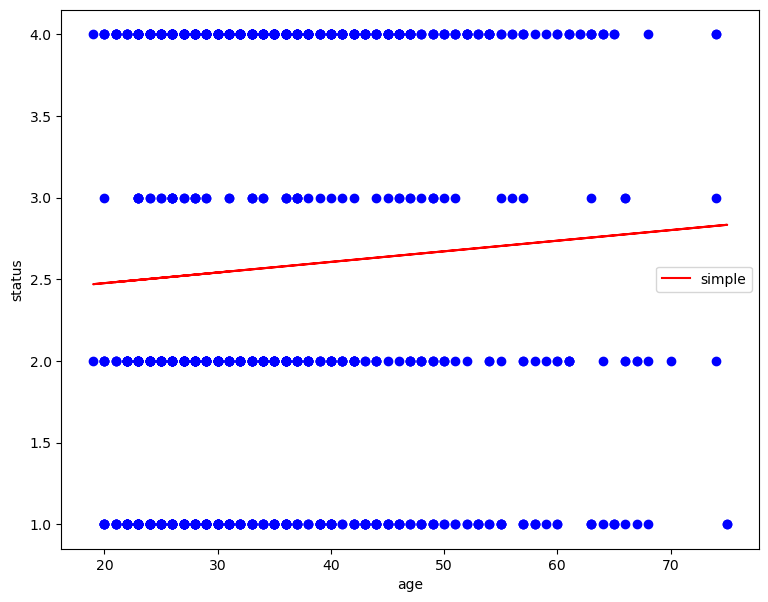

In [24]:
# fig, ax = plt.subplots(figsize=(9,7))
# ax.scatter((a.reshape(-1,1)),y, color='blue')
# ax.plot((a.reshape(-1,1)),lr_model.predict(a.reshape(-1,1)), color='red', label="simple")

# xvals = np.linspace(19, 75)
# Xfeatures = np.empty((len(xvals), 2))
# Xfeatures[:, 0] = xvals
# Xfeatures[:, 1] = xvals * xvals
# # ax.plot(xvals, quadratic_model.predict(Xfeatures),
# #         color="black", label='quadratic')

# ax.set_xlabel('age')
# ax.set_ylabel('status')
# ax.legend()

<AxesSubplot:xlabel='age', ylabel='status'>

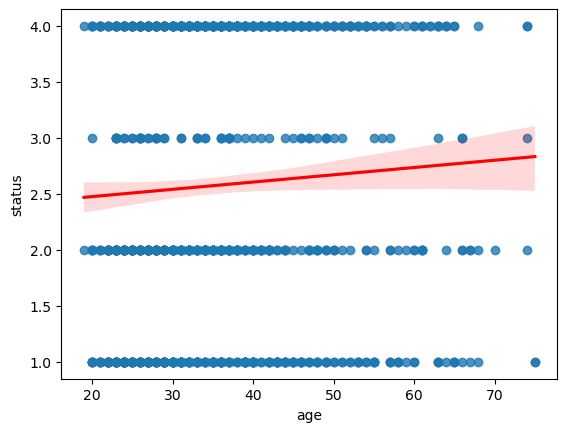

In [32]:
##Regression plot using Status as the target and Age as the feature

sns.regplot(data=sgcredit_df, x="age", y="status", robust=True, line_kws=dict(color="r"))

In [ ]:
y2 = sgcredit_df["duration"]
X2 = sgcredit_df[["age", "Amount",]]